In [61]:
import cv2
import numpy as np
import os
import random
import numpy as np
from skimage import img_as_ubyte
from skimage.util import random_noise
from PIL import Image,ImageFilter

def add_blur(image):
    image = Image.fromarray(image)
    gaussImage = image.filter(ImageFilter.GaussianBlur(1.5))
    return np.array(gaussImage)

def add_poisson_noise(image):
    image = np.array(image, dtype=float)
    noisy_image = random_noise(image, mode='poisson')
    noisy_image = img_as_ubyte(noisy_image)
    
    return noisy_image
def add_gaussian_w_noise(image):
    row, col, ch = image.shape
    a = np.random.randint(40,80)
    mean = a
    var = a
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)
def add_gaussian_noise(image):
    row, col, ch = image.shape
    mean = 0
    var = np.random.randint(100,200)
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_salt_pepper_noise(image):
    s_vs_p = 0.6
    amount = 0.01
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords[0], coords[1], :] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords[0], coords[1], :] = 0
    return out

def add_speckle_noise(image):
    row, col, ch = image.shape
    gauss = np.random.randn(row, col, ch)*0.1
    noisy = image + image * gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_random_noise(image):
    noise_types = [add_salt_pepper_noise,add_gaussian_noise,add_speckle_noise,add_blur,add_gaussian_w_noise]
    noise_func = np.random.choice(noise_types,p = [0.1,0.25,0.2,0.25,0.2])
    return noise_func(image)

In [62]:
def process_dataset(dataset_path, output_path, set_):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    count = 0
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        for filename in filenames:
            if(set_ == 'train' and count == 6000):
                break
            if(set_ == 'val' and count == 1000):
                break
            if(set_ == 'test' and count == 1000):
                break
            count += 1
            if filename.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(dirpath, filename)
                image = cv2.imread(image_path)
                image_resized = cv2.resize(image, (256, 256))
                
                noisy_image = add_random_noise(image_resized)
                
                # Create a unique folder for this image
                image_folder_name = os.path.splitext(filename)[0]  # strip file extension
                image_output_folder = os.path.join(output_path, f"{image_folder_name}_{count}")
                if not os.path.exists(image_output_folder):
                    os.makedirs(image_output_folder)
                # Save resized original image
                cv2.imwrite(os.path.join(image_output_folder, "gt.jpg"), image_resized)
                # Save noisy image
                cv2.imwrite(os.path.join(image_output_folder, "noise.jpg"), noisy_image)

In [63]:
img_path = "C:\\Users\\DHAN RAJ\\Downloads\\IIIT-HW-Hindi_v1\\HindiSeg\\HindiSeg\\val\\12\\42\\1_1.jpg"
image = cv2.imread(img_path)
image_resized = cv2.resize(image, (256, 256))
gauss = add_gaussian_noise(image_resized)
salt = add_salt_pepper_noise(image_resized)
speckle = add_speckle_noise(image_resized)
blur = add_blur(image_resized)

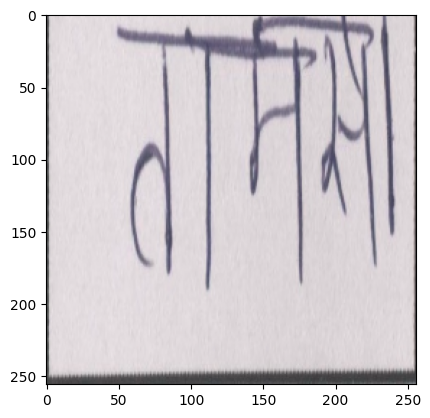

In [64]:
import matplotlib.pyplot as plt
plt.imshow(image_resized)

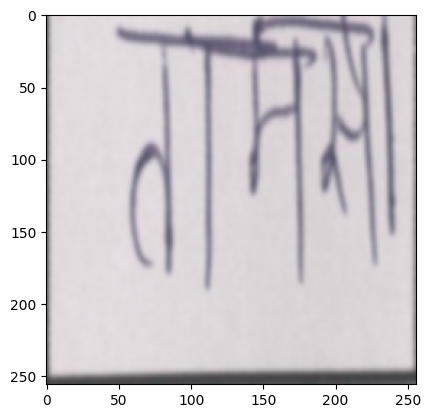

In [65]:
plt.imshow(blur)

In [66]:
cv2.imwrite(os.path.join("C:\\Users\\DHAN RAJ\\Downloads\\" + "org_img.jpg"), image_resized)

True

In [67]:
# Process train, test, and val datasets
parent_dataset_path = 'C:\\Users\\DHAN RAJ\\Downloads\\IIIT-HW-Hindi_v1\\HindiSeg\\HindiSeg'
parent_output_path = 'C:\\Users\\DHAN RAJ\\Downloads\\devanagari_noise_set_256_8k'
for subset in ['train', 'test', 'val']:
    process_dataset(os.path.join(parent_dataset_path, subset), os.path.join(parent_output_path, subset), subset)